## 模型正则化

### 岭回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt

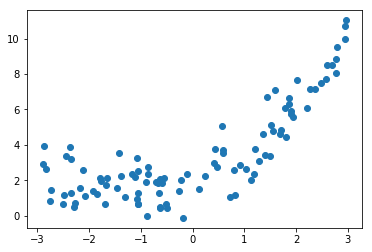

In [2]:
x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0,1,size=100)
plt.scatter(x,y)
plt.show()